In [531]:
import pandas as pd
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import roc_auc_score


In [589]:
train_data = pd.read_csv('train_data.csv',index_col = 0)
test_kaggle = pd.read_csv('test_kaggle.csv',index_col=0)

In [590]:
train_data.columns

Index(['person', 'label', 'Bom', 'Bom - Sem Touch ID', 'Excelente',
       'Muito Bom', 'Novo', 'visitas_dom', 'visitas_lun', 'visitas_mar',
       'visitas_mier', 'visitas_jue', 'visitas_vier', 'visitas_sab',
       'conversiones_mean', 'vio_mas_de_5_veces', 'vio_color_mas_vendido',
       'returns_por_persona_mean', 'solicito_brand_listing',
       'productos_vistos_mean', 'busca_palabra_popular', '128GB', '16GB',
       '256GB', '32GB', '4GB', '512MB', '64GB', '8GB', 'periodo_y',
       'ad campaign hit_mean_y', 'brand listing_mean_y', 'checkout_mean_y',
       'conversion_mean_y', 'generic listing_mean_y', 'lead_mean_y',
       'search engine hit_mean_y', 'searched products_mean_y',
       'staticpage_mean_y', 'viewed product_mean_y', 'visited site_mean_y',
       'tiempo_ultima_conversion', 'timestamp_x', 'tiempo_ultimo_checkout',
       'timestamp_y', 'tiempo_ultima_visita', 'timestamp_x.1',
       'tiempo_ultimo_lead', 'tiempo_entre_conversiones_mean_log_x',
       'timestamp_y.

In [591]:
features = ['Bom', 'Bom - Sem Touch ID', 'Excelente',
       'Muito Bom', 'Novo', 'visitas_dom', 'visitas_lun', 'visitas_mar',
       'visitas_mier', 'visitas_jue', 'visitas_vier', 'visitas_sab',
       'conversiones_mean', 'vio_mas_de_5_veces', 'vio_color_mas_vendido',
       'returns_por_persona_mean', 'solicito_brand_listing',
       'productos_vistos_mean','busca_palabra_popular', '128GB',
       '16GB', '256GB', '32GB', '4GB', '512MB', '64GB', '8GB', 'periodo_y',
       'ad campaign hit_mean_y', 'brand listing_mean_y', 'checkout_mean_y',
       'conversion_mean_y', 'generic listing_mean_y', 'lead_mean_y',
       'search engine hit_mean_y', 'searched products_mean_y',
       'staticpage_mean_y', 'viewed product_mean_y', 'visited site_mean_y',
       'tiempo_ultima_conversion','tiempo_ultimo_checkout','tiempo_ultima_visita','tiempo_ultimo_lead','tiempo_entre_conversiones_mean_log_y',
       'tiempo_entre_checkout_mean_log','vio_producto_popular','Apple',
       'Motorola', 'Samsung']

In [592]:
X = train_data[features]
Y = train_data['label']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [520]:
params = {'objective':['binary:logistic'],'colsample_bytree': [0.5,.6,.7,.8,.9,1.0], 'learning_rate': [.7,.75,.8,.85,.9,.95,1.0],
                'max_depth' : [10,15,20,25,30], 'n_estimators' : [10,20,30],'seed':[123]}

In [521]:
cv = GridSearchCV(estimator=xgb.XGBRegressor(),param_grid=params,scoring='roc_auc',cv=3)

In [547]:
dmatrix = xgb.DMatrix(data=train_data[features],label=train_data['label'],feature_names=features)

In [523]:
cv.fit(X_train,Y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'objective': ['binary:logistic'], 'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'learning_rate': [0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0], 'max_depth': [10, 15, 20, 25, 30], 'n_estimators': [10, 20, 30], 'seed': [123]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [524]:
cv.best_score_

0.8170026928945818

In [548]:
xgbRegressor = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
      max_depth=3, min_child_weight=1, n_estimators=50,
     n_jobs=1, objective='binary:logistic', random_state=0,
    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=5,
   silent=True, subsample=1)



In [81]:
#params = {'objective':'binary:logistic','colsample_bytree': 0.5, 'learning_rate': 1.0,
                #'max_depth' : 10, 'n_estimators' : 20,'seed':123}

#xgb.cv(dtrain=dmatrix,params=params)

In [593]:
xgbRegressor.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=5, silent=True,
       subsample=1)

In [594]:
roc_auc_score(Y_test,xgbRegressor.predict(X_test))

0.8772874245595911

In [600]:
xg_reg = xgb.train(params={'base_score':0.5, 'booster':'gbtree', 'colsample_bylevel':1,
'colsample_bytree':1, 'gamma':0,'learning_rate':1.0, 'max_delta_step':0,
'max_depth':3, 'min_child_weight':1, 'n_estimators':50,
'n_jobs':1, 'objective':'binary:logistic', 'random_state':0,
'reg_alpha':0,'reg_lambda':1, 'scale_pos_weight':1,
'silent':True, 'subsample':1}, dtrain=dmatrix, num_boost_round=10)

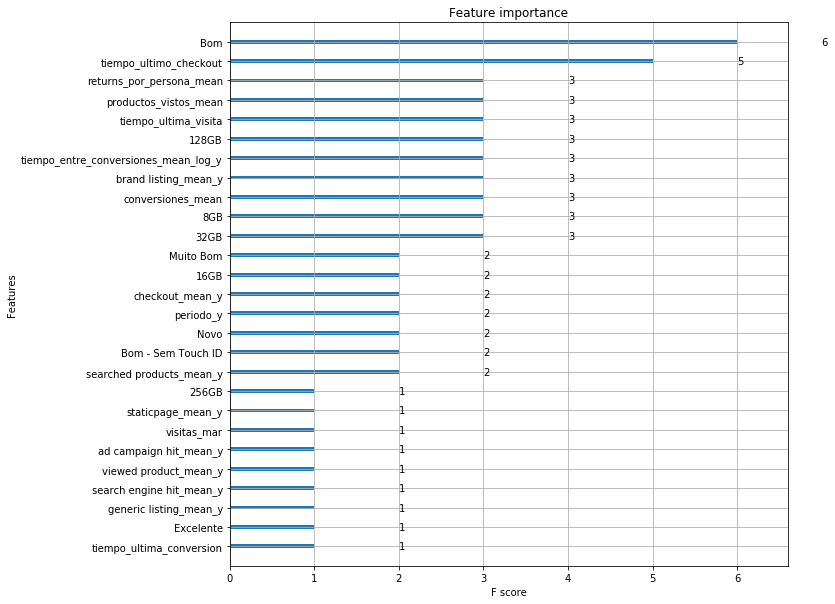

In [601]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

# Test Kaggle

In [595]:
test_kaggle['prediction'] = xgbRegressor.predict(test_kaggle[features])

In [596]:
submit_kaggle = pd.DataFrame({'person':test_kaggle['person'],'label':test_kaggle['prediction']})

In [597]:
submit_kaggle['label'] = submit_kaggle['label'].transform(lambda x: 0.0 if x < 0.0 else x)
submit_kaggle['label'] = submit_kaggle['label'].transform(lambda x: 1.0 if x > 1.0 else x)

In [598]:
submit_kaggle.reset_index(inplace = True)
submit_kaggle.drop(columns='index',inplace=True)
submit_kaggle.set_index(keys='person',inplace=True)

In [599]:
submit_kaggle.to_csv('submit_kaggle.csv')